In [48]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
# Load the Keras model
model = load_model('HundredDayAverageModel1.keras')

In [49]:
data1 = pd.read_csv('/content/TSLA_data.csv')
data2 = pd.read_csv('/content/PG_data.csv')
data3 = pd.read_csv('/content/V_data.csv')

In [50]:
# copying the data
data_min_max_scaled = data1.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
data1 = data_min_max_scaled

In [51]:
# copying the data
data_min_max_scaled = data2.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
data2 = data_min_max_scaled

In [52]:
# copying the data
data_min_max_scaled = data3.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
data3 = data_min_max_scaled

In [53]:
data1arr = np.array(data1.drop(columns=['Label','TEN','HUNDREAD']))
data2arr = np.array(data2.drop(columns=['Label','TEN','HUNDREAD']))
data3arr = np.array(data3.drop(columns=['Label','TEN','HUNDREAD']))

In [54]:
data = []
temp = []
for i in range(0,len(data1arr)-100):
  for j in range(0,100):
    temp.append(data1arr[i+j])
  data.append(temp)
  temp = []
data_Arr1 = np.array(data)

In [55]:
data = []
temp = []
for i in range(0,len(data2arr)-100):
  for j in range(0,100):
    temp.append(data2arr[i+j])
  data.append(temp)
  temp = []
data_Arr2 = np.array(data)

In [56]:
data = []
temp = []
for i in range(0,len(data3arr)-100):
  for j in range(0,100):
    temp.append(data3arr[i+j])
  data.append(temp)
  temp = []
data_Arr3 = np.array(data)

In [57]:
np.shape(data_Arr1)

(3300, 100, 5)

In [58]:
np.shape(data_Arr2)

(5937, 100, 5)

In [59]:
np.shape(data_Arr3)

(3874, 100, 5)

In [60]:
data_Val1 = np.array(data1['HUNDREAD'])
data_Val1 = data_Val1[100:]

In [61]:
data_Val2 = np.array(data2['HUNDREAD'])
data_Val2 = data_Val2[100:]

In [62]:
data_Val3 = np.array(data3['HUNDREAD'])
data_Val3 = data_Val3[100:]

In [63]:
np.shape(data_Val1)

(3300,)

In [64]:
np.shape(data_Val2)

(5937,)

In [65]:
np.shape(data_Val3)

(3874,)

In [66]:
dataTest1= data_Arr1.reshape(3300,1,500)
dataTest2= data_Arr2.reshape(5937,1,500)
dataTest3= data_Arr3.reshape(3874,1,500)

In [67]:
valueTest1= data_Val1.reshape(3300,1,1)
valueTest2= data_Val2.reshape(5937,1,1)
valueTest3= data_Val3.reshape(3874,1,1)

In [71]:
model.fit(dataTest1,valueTest1,epochs=50)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MeanAbsoluteError: 67.5464 - loss: 13577.3701
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - MeanAbsoluteError: 65.4167 - loss: 13221.6641
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - MeanAbsoluteError: 64.4152 - loss: 13057.3447
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - MeanAbsoluteError: 69.1460 - loss: 14261.7363
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - MeanAbsoluteError: 66.3937 - loss: 13541.3252
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MeanAbsoluteError: 65.1233 - loss: 13299.4629
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - MeanAbsoluteError: 66.0664 - loss: 13588.7881
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - MeanAbsoluteError: 65.8829 - loss: 13477.9727
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - MeanAbsoluteError: 67.0112 - loss: 13740.4531
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - MeanAbsoluteError: 66.6647 - loss: 

In [72]:
model.fit(dataTest2,valueTest2,epochs=50)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MeanAbsoluteError: 54.9535 - loss: 4111.4360
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - MeanAbsoluteError: 55.1594 - loss: 4150.2329
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - MeanAbsoluteError: 55.8810 - loss: 4267.6064
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - MeanAbsoluteError: 55.4497 - loss: 4171.5229
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - MeanAbsoluteError: 55.2994 - loss: 4182.6548
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - MeanAbsoluteError: 54.0972 - loss: 3976.9023
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - MeanAbsoluteError: 55.7171 - loss: 4244.1680
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - MeanAbsoluteError: 54.6091 - loss: 4051.6050
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - MeanAbsoluteError: 55.1301 - loss: 4126.1504
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - MeanAbsoluteError: 54.6591 - loss: 4066.0063

In [73]:
prediction = model.predict(dataTest3)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [74]:
plotPred = []
for i in range(len(prediction)):
  plotPred.append(prediction[i][0][0])
plotVal = []
for i in range(len(valueTest3)):
  plotVal.append(valueTest3[i][0][0])

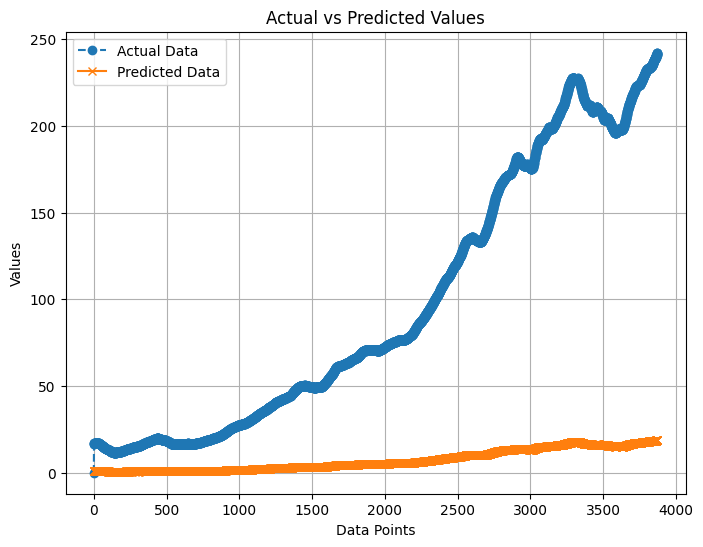

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(plotVal, label='Actual Data', marker='o', linestyle='--')
plt.plot(plotPred, label='Predicted Data', marker='x', linestyle='-')

# Add labels and legend
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()